In [29]:
!pip install -q yfinance scikeras

In [30]:
pip install keras_tuner

In [31]:
import pandas as pd

df = pd.read_csv('training_data.csv')
df = df.drop(columns=['Unnamed: 0'])
# Forward fill missing values within each group
filtered_df = df.groupby('ticker', group_keys=False).apply(lambda group: group.ffill())

# Backward fill the remaining missing values within each group
filtered_df = filtered_df.groupby('ticker', group_keys=False).apply(lambda group: group.bfill())

In [32]:
filtered_df

,date,Open,High,Low,Close,Adj Close,Volume,ticker,mentions,popularity,positive,neutral,negative,daily_weighted_avg
0,2022-03-02,164.389999,167.360001,162.949997,166.559998,164.678116,79724800,AAPL,597.0,1.534625,31.825796,25.460637,42.713568,-0.438845
1,2022-03-03,168.470001,168.910004,165.550003,166.229996,164.351837,76678400,AAPL,479.0,1.195677,29.853862,24.425887,45.720251,-0.204386
2,2022-03-04,164.490005,165.550003,162.100006,163.169998,161.326401,83737200,AAPL,211.0,0.600660,31.279621,17.061611,51.658768,0.041050
3,2022-03-07,163.360001,165.020004,159.039993,159.300003,157.500137,96418800,AAPL,405.0,0.862087,34.567901,20.987654,44.444444,-0.022204
4,2022-03-08,158.820007,162.880005,155.800003,157.440002,155.661148,131148300,AAPL,625.0,1.206937,33.920000,18.560000,47.520000,-0.004396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,TSLA,304.0,1.616677,36.513158,15.789474,47.697368,0.108099
1379,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,TSLA,1229.0,7.050657,31.082181,19.121237,49.796583,0.108099
1380,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,TSLA,1131.0,5.660944,34.040672,20.512821,45.446508,0.108099
1381,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900,TSLA,1682.0,8.868969,36.741974,18.549346,44.708680,0.108099


In [33]:
filtered_df.columns

Index(['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ticker',
       'mentions', 'popularity', 'positive', 'neutral', 'negative',
       'daily_weighted_avg'],
      dtype='object')

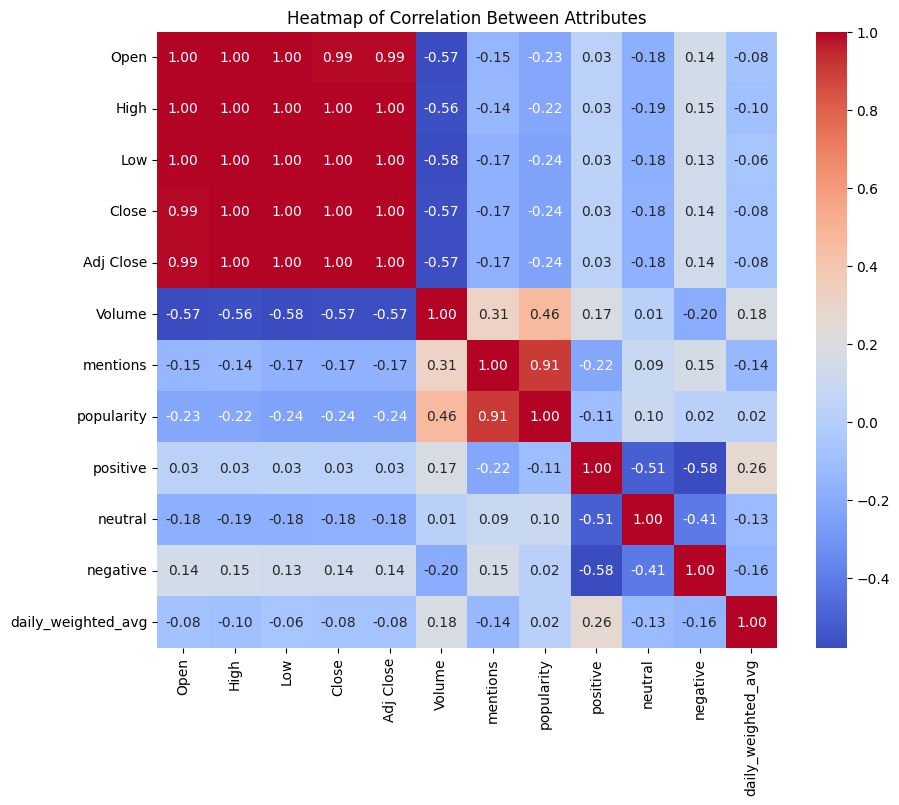

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_corr = filtered_df[filtered_df['ticker']=="TSLA"].drop(columns=['date', 'ticker'])

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8)) # You can adjust the figure size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Heatmap of Correlation Between Attributes')
plt.show()

In [35]:
filtered_df

,date,Open,High,Low,Close,Adj Close,Volume,ticker,mentions,popularity,positive,neutral,negative,daily_weighted_avg
0,2022-03-02,164.389999,167.360001,162.949997,166.559998,164.678116,79724800,AAPL,597.0,1.534625,31.825796,25.460637,42.713568,-0.438845
1,2022-03-03,168.470001,168.910004,165.550003,166.229996,164.351837,76678400,AAPL,479.0,1.195677,29.853862,24.425887,45.720251,-0.204386
2,2022-03-04,164.490005,165.550003,162.100006,163.169998,161.326401,83737200,AAPL,211.0,0.600660,31.279621,17.061611,51.658768,0.041050
3,2022-03-07,163.360001,165.020004,159.039993,159.300003,157.500137,96418800,AAPL,405.0,0.862087,34.567901,20.987654,44.444444,-0.022204
4,2022-03-08,158.820007,162.880005,155.800003,157.440002,155.661148,131148300,AAPL,625.0,1.206937,33.920000,18.560000,47.520000,-0.004396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,TSLA,304.0,1.616677,36.513158,15.789474,47.697368,0.108099
1379,2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,TSLA,1229.0,7.050657,31.082181,19.121237,49.796583,0.108099
1380,2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,TSLA,1131.0,5.660944,34.040672,20.512821,45.446508,0.108099
1381,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900,TSLA,1682.0,8.868969,36.741974,18.549346,44.708680,0.108099


## Baseline Model:


In [36]:
def base_ml_pipeline(bstep=1, dim=7, ticker='TSLA'):
    '''
    Create dataframe
    '''
    import pandas as pd
    import numpy as np
    df = filtered_df
    data = df.copy()
    data = data[data['ticker']==ticker]
    float32_cols = list(data.select_dtypes(include='float32'))
    df[float32_cols] = data[float32_cols].astype('float64')
    subset_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'mentions', 'popularity', 'positive', 'neutral', 'negative', 'daily_weighted_avg']
    # subset_columns = ['Close']
    data = data[subset_columns]
    # Convert the dataframe to a numpy array
    dataset = data.values
    # Get the number of rows to train the model on
    training_data_len = int(np.ceil( len(dataset) * .95 ))


    '''
    Scale the data
    '''
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    '''
    Train-test split
    '''
    # Create the scaled training data set
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    close_index = list(data.columns).index('Close')
    for i in range(bstep, len(train_data)):
        x_train.append(train_data[i-bstep:i, 0:dataset.shape[1]])
        y_train.append(train_data[i, close_index])

    # Convert the x_train and y_train to numpy arrays and reshape x_train
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], dim))

    # Preparing the test data
    test_data = scaled_data[training_data_len - bstep: , :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = []
    for i in range(bstep, len(test_data)):
        x_test.append(test_data[i-bstep:i, 0:dataset.shape[1]])
        if (i < len(test_data)):  # Ensure we do not go out of bounds
            y_test.append(test_data[i, close_index])  # Correction here to ensure y_test is generated correctly

    # Convert the data to numpy arrays and reshape x_test
    x_test, y_test = np.array(x_test), np.array(y_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], dim))
    '''
    Fit Model
    '''
    from keras.models import Sequential
    from keras.layers import Dense, LSTM

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (bstep, dim)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=8, epochs=10)

    '''
    Prediction
    '''
    predictions = model.predict(x_test)
    print(predictions.shape)
    prediction_copies_array = np.repeat(predictions,dim, axis=-1)
    pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(predictions),dim)))[:,0]
    # # Get the root mean squared error (RMSE)
    y_test_valid = data[training_data_len:]['Close']
    rmse = np.sqrt(np.mean(((pred - y_test_valid) ** 2)))

    '''
    Plot
    '''
    import matplotlib.pyplot as plt
    # Plot the data
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = pred
    valid = valid[['Close', 'Predictions']]
    # Visualize the data
    plt.figure(figsize=(16,6))
    plt.title('Model')

    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    # plt.show()

    return valid, rmse, model, scaler

In [ ]:
valid, rmse, model, scaler = base_ml_pipeline(dim=7)

In [ ]:
rmse

In [ ]:
valid

In [ ]:
model.summary

## Model Pipeline below:

In [37]:
def ml_pipeline(bstep=1, dim=7, ticker='TSLA'):
    '''
    Create dataframe
    '''
    import pandas as pd
    import numpy as np
    df = filtered_df
    data = df.copy()
    data = data[data['ticker']==ticker]
    float32_cols = list(data.select_dtypes(include='float32'))
    df[float32_cols] = data[float32_cols].astype('float64')
    subset_columns = ['Close', 'Volume', 'mentions', 'positive', 'neutral', 'negative', 'daily_weighted_avg']
    # subset_columns = ['Close']
    data = data[subset_columns]
    # Convert the dataframe to a numpy array
    dataset = data.values
    # Get the number of rows to train the model on
    training_data_len = int(np.ceil( len(dataset) * .95 ))


    '''
    Scale the data
    '''
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    '''
    Train-test split
    '''
    # Create the scaled training data set
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    close_index = list(data.columns).index('Close')  # Assuming 'data' has the original columns including 'Close'
    for i in range(bstep, len(train_data)):
        x_train.append(train_data[i-bstep:i, 0:dataset.shape[1]])
        y_train.append(train_data[i, close_index])

    # Convert the x_train and y_train to numpy arrays and reshape x_train
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], dim))

    # Preparing the test data
    test_data = scaled_data[training_data_len - bstep: , :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = []
    for i in range(bstep, len(test_data)):
        x_test.append(test_data[i-bstep:i, 0:dataset.shape[1]])
        if (i < len(test_data)):  # Ensure we do not go out of bounds
            y_test.append(test_data[i, close_index])  # Correction here to ensure y_test is generated correctly

    # Convert the data to numpy arrays and reshape x_test
    x_test, y_test = np.array(x_test), np.array(y_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], dim))
    '''
    Fit Model
    '''
    from keras.models import Sequential
    from keras.layers import Dense, LSTM

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (bstep, dim)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=8, epochs=10)

    '''
    Prediction
    '''
    predictions = model.predict(x_test)
    print(predictions.shape)
    prediction_copies_array = np.repeat(predictions,dim, axis=-1)
    pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(predictions),dim)))[:,0]
    # # Get the root mean squared error (RMSE)
    y_test_valid = data[training_data_len:]['Close']
    rmse = np.sqrt(np.mean(((pred - y_test_valid) ** 2)))

    '''
    Plot
    '''
    import matplotlib.pyplot as plt
    # Plot the data
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = pred
    valid = valid[['Close', 'Predictions']]
    # Visualize the data
    plt.figure(figsize=(16,6))
    plt.title('Model')

    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    # plt.show()

    return valid, rmse, model, scaler

In [ ]:
valid, rmse, model, scaler = ml_pipeline(dim=7)

In [ ]:
rmse

In [ ]:
valid

In [ ]:
model.summary()

## Model with Elastic Net Tuning

In [43]:
def elastic_ml_pipeline(bstep=1, dim=7, ticker='TSLA'):
    '''
    Create dataframe
    '''
    import pandas as pd
    import numpy as np
    df = filtered_df
    data = df.copy()
    data = data[data['ticker']==ticker]
    float32_cols = list(data.select_dtypes(include='float32'))
    df[float32_cols] = data[float32_cols].astype('float64')
    subset_columns = ['Close', 'Volume', 'mentions', 'positive', 'neutral', 'negative', 'daily_weighted_avg']
    data = data[subset_columns]
    # Convert the dataframe to a numpy array
    dataset = data.values
    # Get the number of rows to train the model on
    training_data_len = int(np.ceil( len(dataset) * .95 ))


    '''
    Scale the data
    '''
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)

    '''
    Train-test split
    '''
    # Create the scaled training data set
    train_data = scaled_data[0:int(training_data_len), :]
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []
    close_index = list(data.columns).index('Close')  # Assuming 'data' has the original columns including 'Close'
    for i in range(bstep, len(train_data)):
        x_train.append(train_data[i-bstep:i, 0:dataset.shape[1]])
        y_train.append(train_data[i, close_index])

    # Convert the x_train and y_train to numpy arrays and reshape x_train
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], dim))

    # Preparing the test data
    test_data = scaled_data[training_data_len - bstep: , :]
    # Create the data sets x_test and y_test
    x_test = []
    y_test = []
    for i in range(bstep, len(test_data)):
        x_test.append(test_data[i-bstep:i, 0:dataset.shape[1]])
        if (i < len(test_data)):  # Ensure we do not go out of bounds
            y_test.append(test_data[i, close_index])  # Correction here to ensure y_test is generated correctly

    # Convert the data to numpy arrays and reshape x_test
    x_test, y_test = np.array(x_test), np.array(y_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], dim))
    '''
    Fit Model
    '''
    from keras.models import Sequential
    from keras.layers import Dense, LSTM
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import LSTM
    import keras.backend as K
    from keras.callbacks import EarlyStopping
    import keras_tuner as kt
    from keras.layers import Dropout
    from keras_tuner.tuners import RandomSearch
    from keras_tuner.engine.hyperparameters import HyperParameters
    from keras.callbacks import EarlyStopping
    from keras.regularizers import l1_l2  # Import L1_L2 regularization
    import tensorflow as tf

    def rmse(y_true, y_pred):
        return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

    def build_model(hp: HyperParameters):
        model = Sequential()
        model.add(LSTM(hp.Int('input_unit', min_value=32, max_value=128, step=32),
                      return_sequences=True, input_shape=(bstep, dim)))

        for i in range(hp.Int('n_layers', 1, 10)):
            return_seq = i < hp.get('n_layers') - 1  # Ensure the last LSTM layer does not return sequences
            model.add(LSTM(hp.Int(f'lstm_{i}_units', min_value=32, max_value=128, step=32),
                          return_sequences=return_seq))

        model.add(Dense(25))
        model.add(Dropout(hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1)))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='mean_squared_error', metrics=[rmse])
        return model

    from keras_tuner import RandomSearch
    from keras.callbacks import EarlyStopping
    from keras_tuner import RandomSearch, Objective

    def run_tuner(x_train, y_train, x_val, y_val):
        # Set up early stopping
        early_stop = EarlyStopping(monitor='val_rmse', patience=3, verbose=1, mode='min')

        # Define the objective with explicit direction
        objective = Objective("val_rmse", direction="min")

        # Initialize the tuner
        tuner = RandomSearch(
            build_model,
            objective=objective,  # Use the explicitly defined objective
            max_trials=20,  # Maximum number of trials to test
            executions_per_trial=1,
            directory='my_tuner_dir_1',
            project_name='lstm_regression'
        )

        # Execute the search
        tuner.search(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stop])

        return tuner

    def get_best_model(tuner):
        # Retrieve the best model
        best_model = tuner.get_best_models(num_models=1)[0]
        return best_model

    # Run the tuner
    tuner = run_tuner(x_train, y_train, x_test, y_test)

    # Get the best model from the tuner
    best_model = get_best_model(tuner)
    print("Best model retrieved. Model summary:")
    best_model.summary()

    '''
    Prediction
    '''
    predictions = best_model.predict(x_test)
    print(predictions.shape)
    prediction_copies_array = np.repeat(predictions,dim, axis=-1)
    pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(predictions),dim)))[:,0]
    # # Get the root mean squared error (RMSE)
    y_test_valid = data[training_data_len:]['Close']
    rmse = np.sqrt(np.mean(((pred - y_test_valid) ** 2)))

    '''
    Plot
    '''
    import matplotlib.pyplot as plt
    # Plot the data
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = pred
    valid = valid[['Close', 'Predictions']]
    # Visualize the data
    plt.figure(figsize=(16,6))
    plt.title('Model')

    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    # plt.show()

    return valid, rmse, best_model, scaler

## Model Comparison and Selection

Trial 20 Complete [00h 00m 23s]
val_rmse: 0.34134700894355774

Best val_rmse So Far: 0.04408218339085579
Total elapsed time: 00h 11m 49s
Best model retrieved. Model summary:


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 52 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 96)               │          39,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 96)               │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 1, 128)              │         115,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 1, 96)               │          86,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 1, 96)               │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 1, 64)               │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │             825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 444,243 (1.69 MB)

 Trainable params: 444,243 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step
(23, 1)
Epoch 1/10


<ipython-input-43-450e58484072>:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1316
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.8834e-04
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7155e-04
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.7472e-04
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9942e-04
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6104e-04
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6594e-04
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0641e-04
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3909e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
(23, 1)
Epoch 1/10


<ipython-input-36-b182247189fb>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1335
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4462e-04
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2630e-04
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.1230e-04
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1237e-04
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6997e-04
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.0066e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
(23, 1)
Reloading Tuner from my_tuner_dir_1/lstm_regression/tuner0.json


<ipython-input-37-9f45ebe66a56>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best model retrieved. Model summary:


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 52 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 96)               │          39,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 96)               │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 1, 128)              │         115,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 1, 96)               │          86,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 1, 96)               │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 1, 64)               │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │             825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 444,243 (1.69 MB)

 Trainable params: 444,243 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 952ms/step
(23, 1)
Epoch 1/10


<ipython-input-43-450e58484072>:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1006
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
(23, 1)
Epoch 1/10


<ipython-input-36-b182247189fb>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1101
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0219
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 9/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 10/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
(23, 1)
Reloading Tuner from my_tuner_dir_1/lstm_regression/tuner0.json


<ipython-input-37-9f45ebe66a56>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best model retrieved. Model summary:


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 52 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 96)               │          39,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 96)               │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 1, 128)              │         115,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 1, 96)               │          86,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 1, 96)               │          74,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 1, 64)               │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │             825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 444,243 (1.69 MB)

 Trainable params: 444,243 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step
(23, 1)


<ipython-input-43-450e58484072>:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred


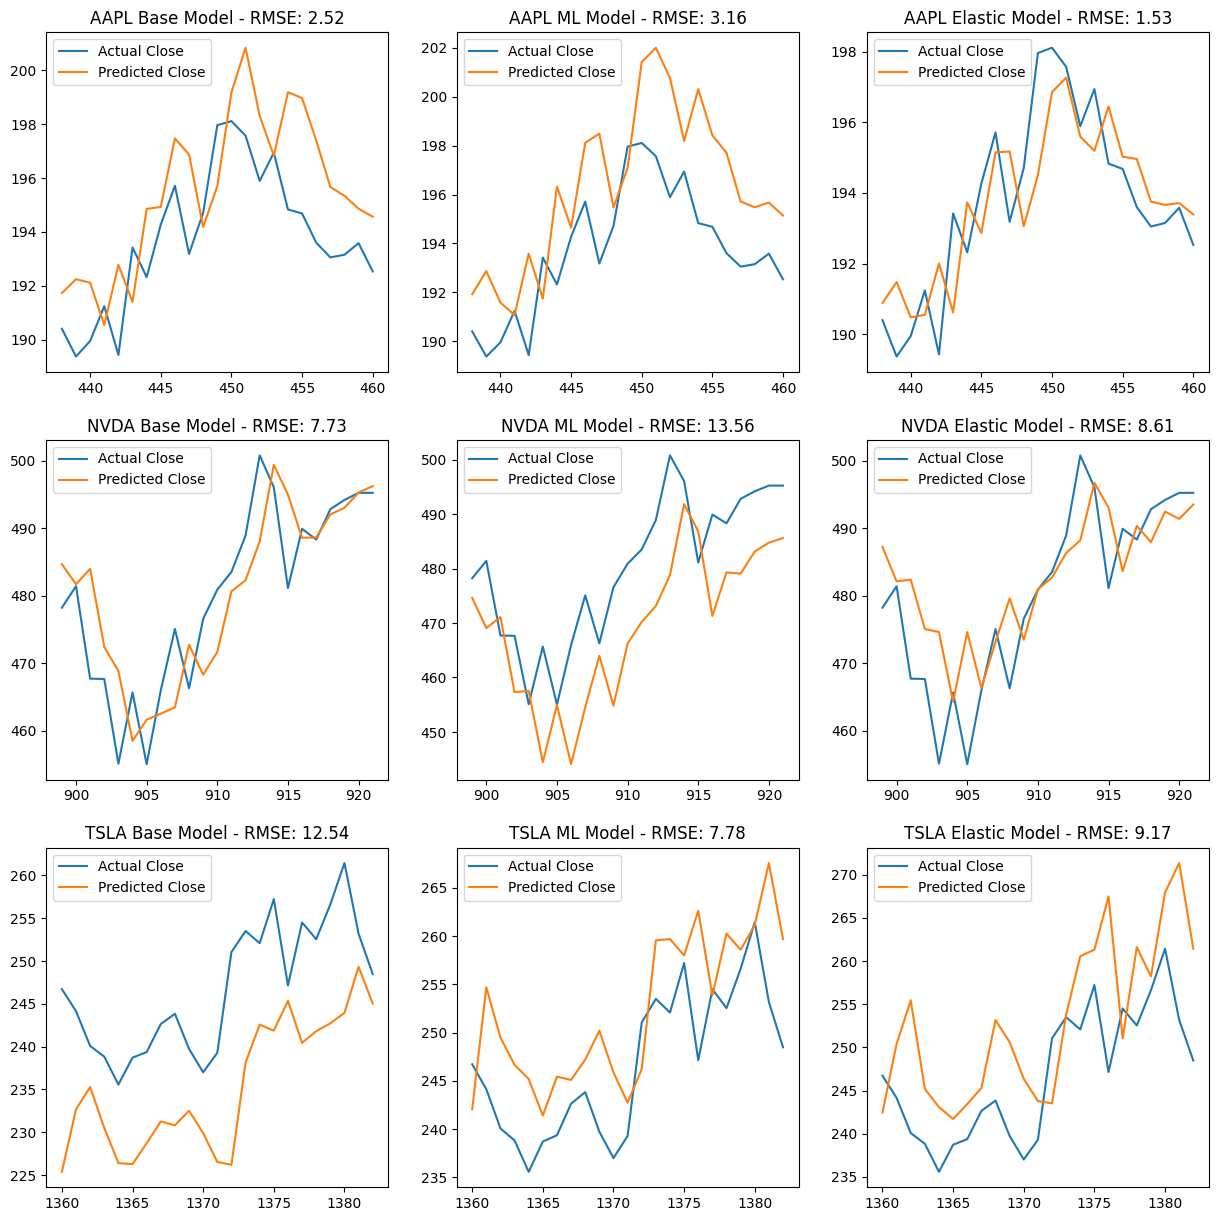

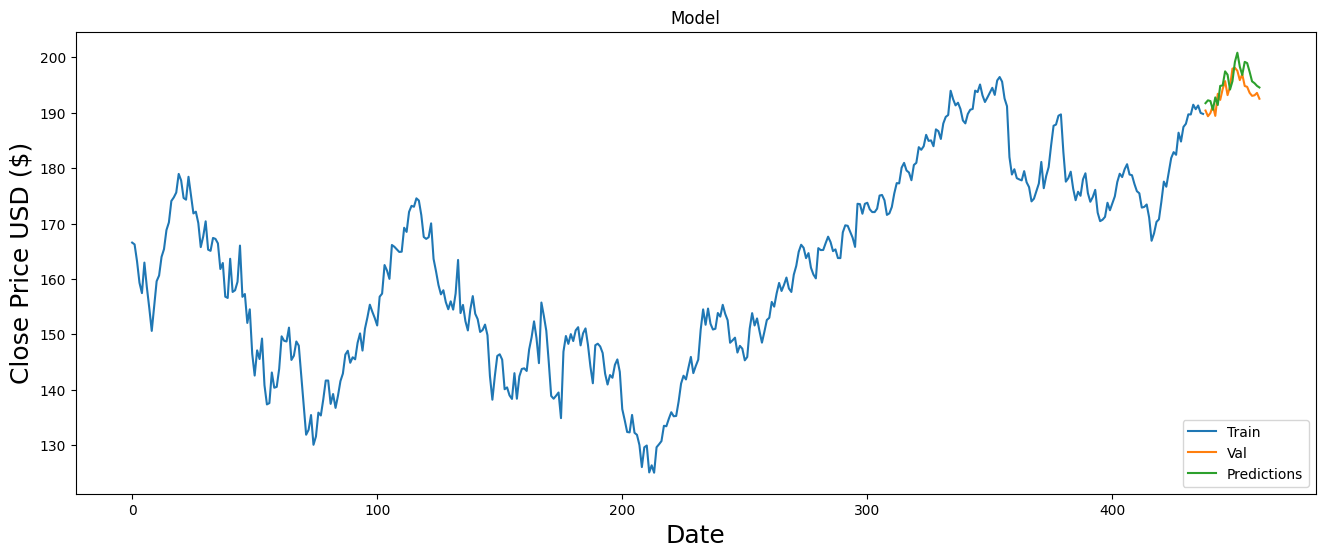

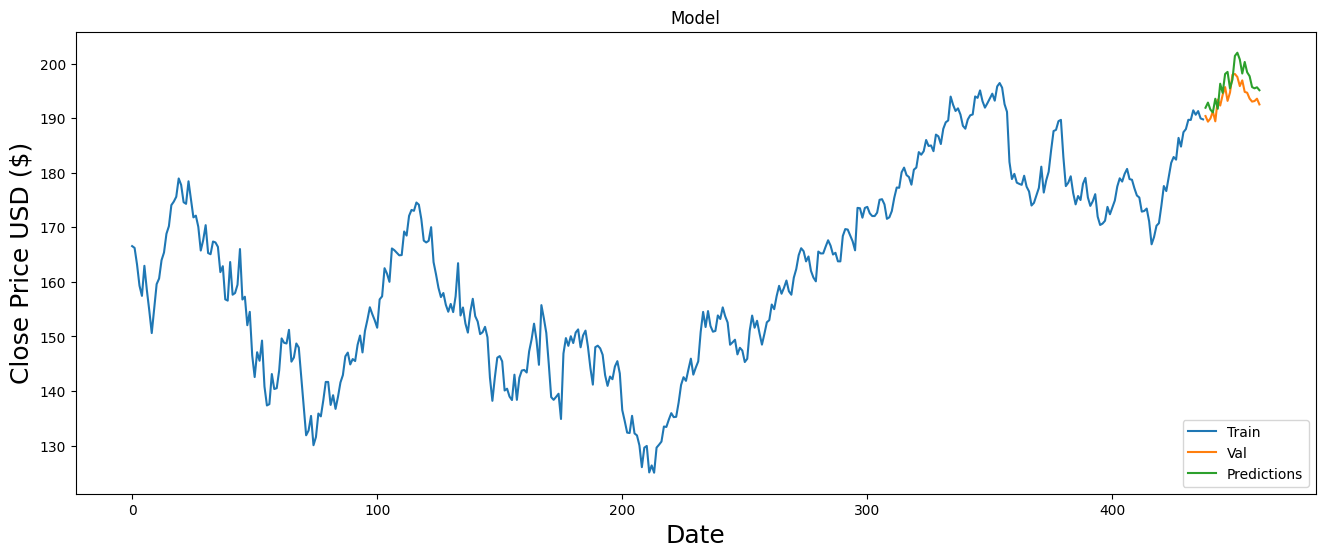

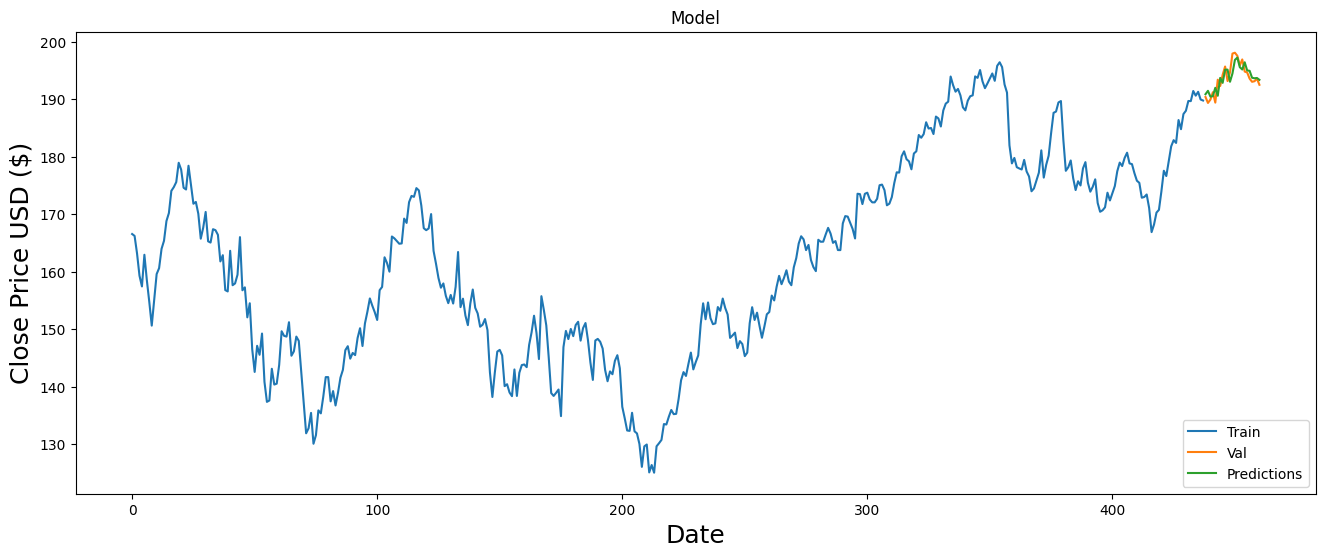

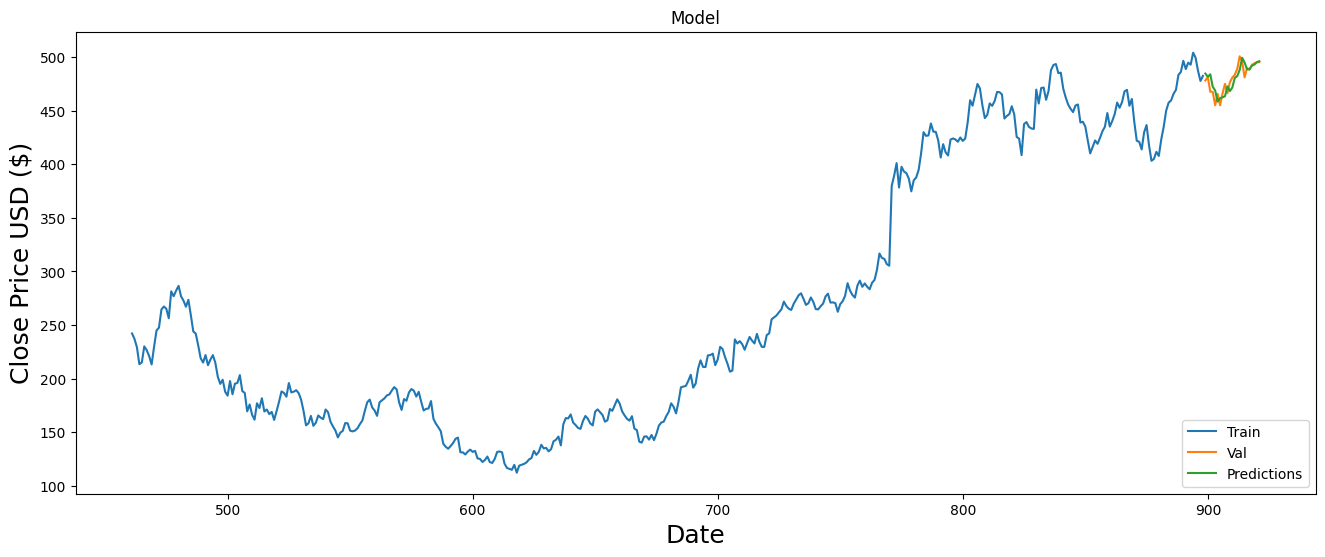

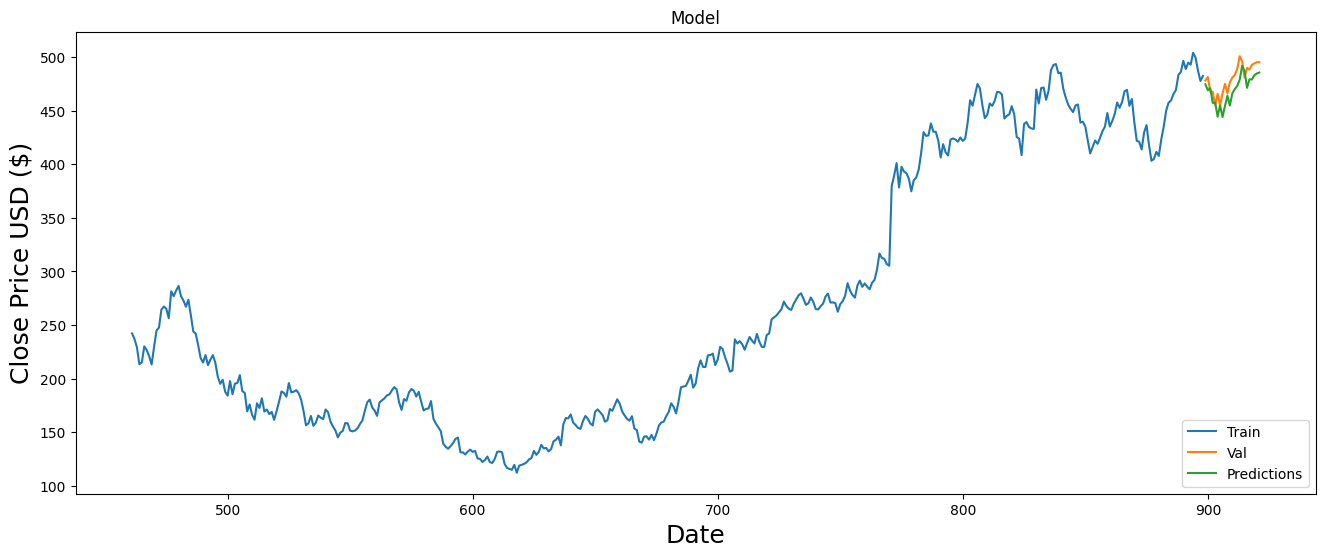

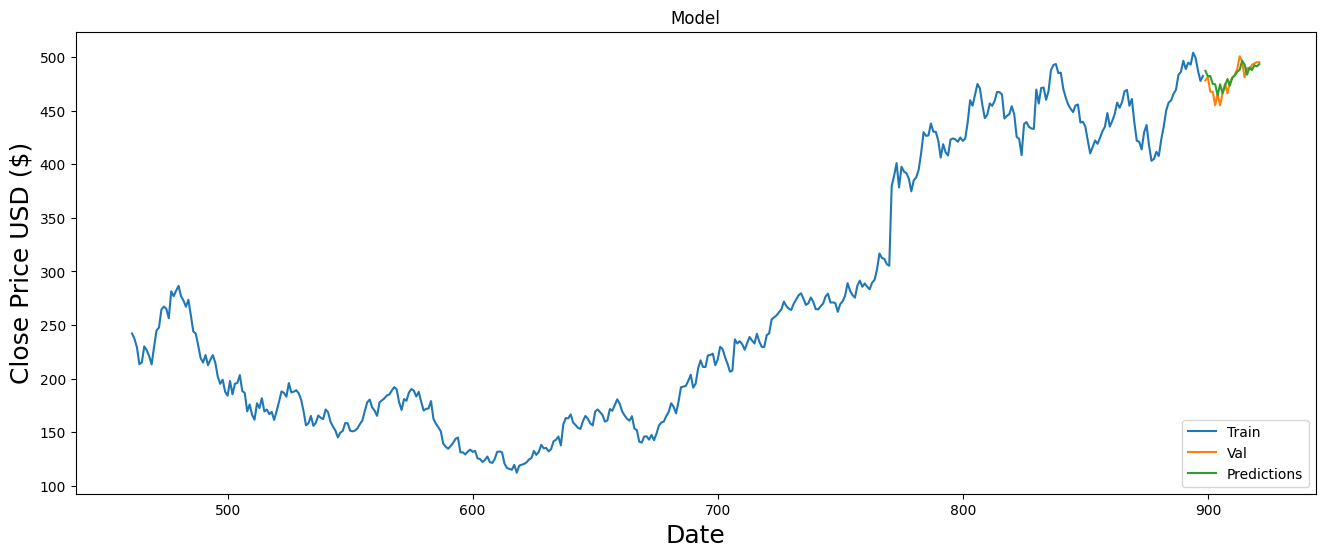

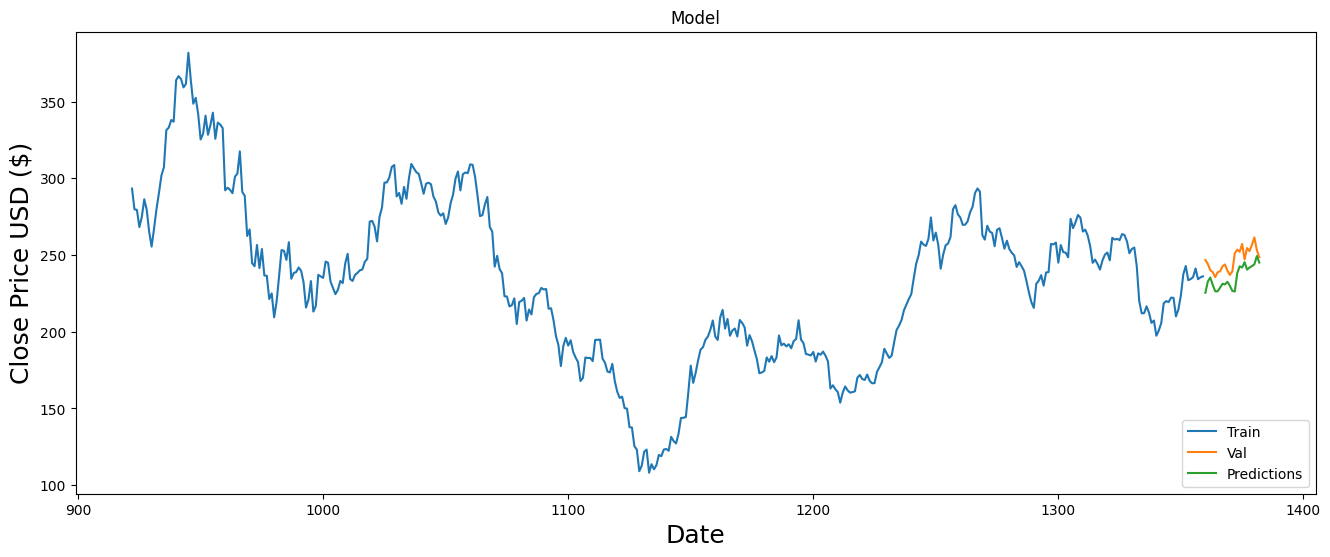

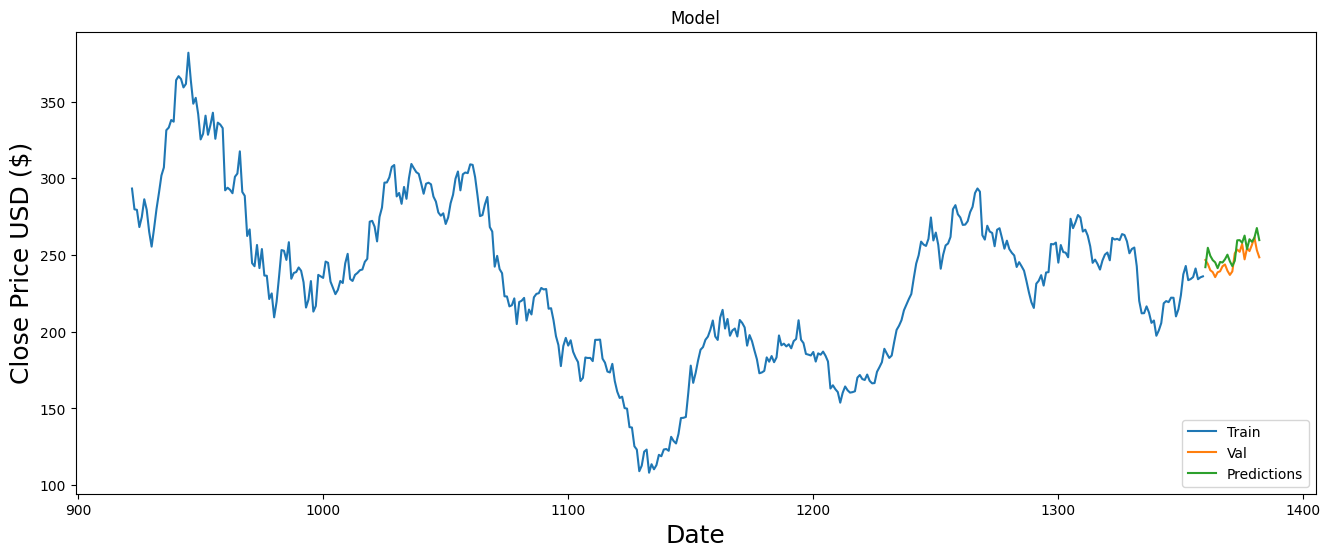

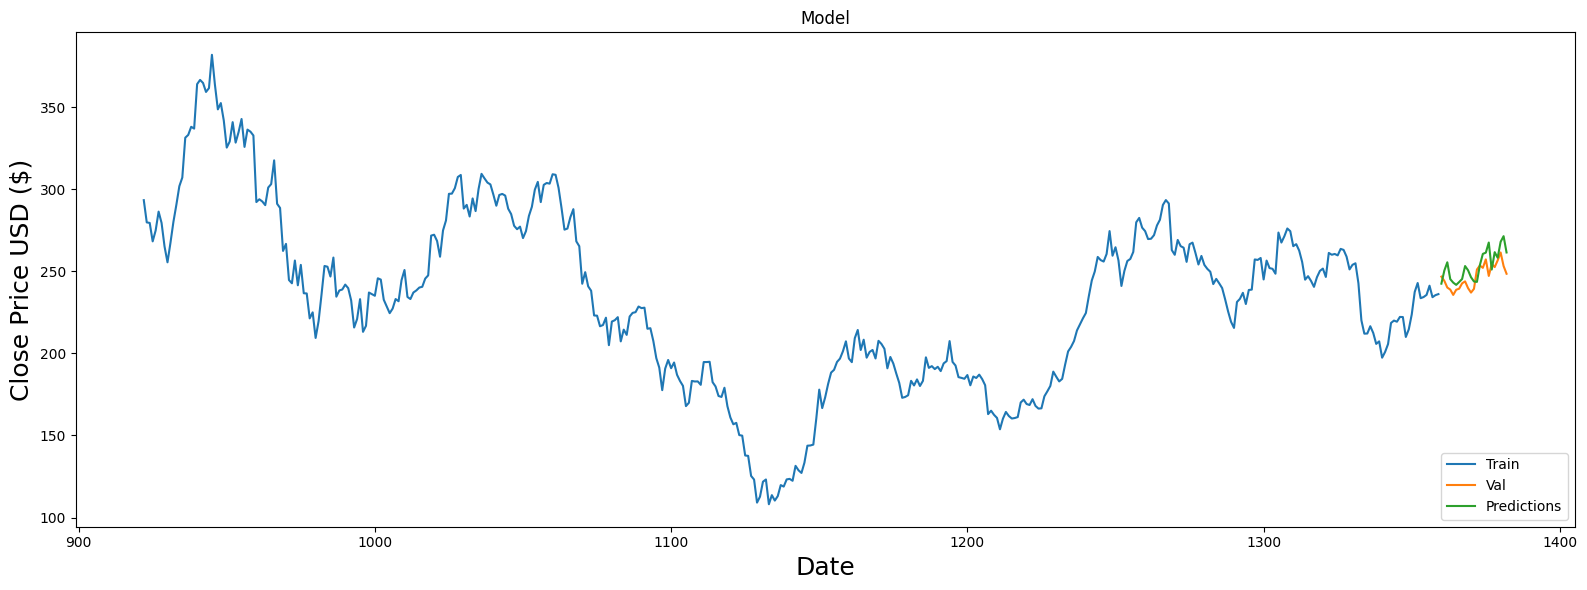

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Example tickers
tickers = ['AAPL', 'NVDA', 'TSLA']

# Define the figure size and layout
fig, axs = plt.subplots(len(tickers), 3, figsize=(15, 15))  # 3 models and 1 row per ticker

# Model functions modified to accept an axis for plotting
def run_base_ml_pipeline(ticker, ax):
    # Implement the model logic
    valid, rmse, model, scaler = base_ml_pipeline(dim=12, ticker=ticker)
    ax.plot(valid['Close'], label='Actual Close')
    ax.plot(valid['Predictions'], label='Predicted Close')
    ax.set_title(f'{ticker} Base Model - RMSE: {rmse:.2f}')
    ax.legend(loc='upper left')
    return rmse

def run_ml_pipeline(ticker, ax):
    # Similar implementation as base_ml_pipeline
    valid, rmse, model, scaler = ml_pipeline(dim=7, ticker=ticker)
    ax.plot(valid['Close'], label='Actual Close')
    ax.plot(valid['Predictions'], label='Predicted Close')
    ax.set_title(f'{ticker} ML Model - RMSE: {rmse:.2f}')
    ax.legend(loc='upper left')
    return rmse

def run_elastic_ml_pipeline(ticker, ax):
    # Similar implementation as base_ml_pipeline
    valid, rmse, model, scaler = elastic_ml_pipeline(ticker=ticker)
    ax.plot(valid['Close'], label='Actual Close')
    ax.plot(valid['Predictions'], label='Predicted Close')
    ax.set_title(f'{ticker} Elastic Model - RMSE: {rmse:.2f}')
    ax.legend(loc='upper left')
    return rmse

# Function to run all models for a given ticker
def run_all_models(ticker, axs_row):
    rmses = []
    rmses.append(run_base_ml_pipeline(ticker, axs_row[0]))
    rmses.append(run_ml_pipeline(ticker, axs_row[1]))
    rmses.append(run_elastic_ml_pipeline(ticker, axs_row[2]))
    return rmses

# Loop through tickers and plot results
all_rmses = {ticker: run_all_models(ticker, axs[i]) for i, ticker in enumerate(tickers)}

plt.tight_layout()
plt.show()

## Model Loading and Usage Example

In [ ]:
# import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from joblib import load
import keras
# Pre-load the scaler and model
scaler = load('AAPL_scaler.joblib')
model = keras.models.load_model('./AAPL_model.keras')

def model_predict(input_data, model, scaler):
    # Ensure input_data is a numpy array
    input_data_np = input_data.values.reshape(1, -1)

    # Scale the input data
    scaled_input_data = scaler.transform(input_data_np).astype('float32')

    # Reshape the input data to match the model's expected input shape
    scaled_input_data = np.reshape(scaled_input_data, (1, 1, -1))

    # Make predictions
    predictions = model.predict(scaled_input_data)

    # Reshape predictions to match the scaler's expected input shape for inverse_transform
    predictions = np.reshape(predictions, (1, -1))

    # Apply inverse_transform to predictions
    prediction_copies_array = np.repeat(predictions, input_data_np.shape[1], axis=-1)
    original_scale_predictions = scaler.inverse_transform(prediction_copies_array)[:, 0]

    return original_scale_predictions

# Assuming 'filtered_df' is your pre-loaded DataFrame
# Select the most recent row for 'TSLA' and drop non-feature columns
input_data = filtered_df[filtered_df['ticker'] == 'AAPL'].iloc[-2].drop(['date', 'ticker'])

# Call the model_predict function
predictions = model_predict(input_data, model, scaler)

# Print the predictions
print(predictions)